In [1]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
print("spam count: " + str(len(df.loc[df.spam==1])))
print("not spam count: " + str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text','spam']]

print(df.shape)

spam count: 1368
not spam count: 4360
(5728, 2)
(5695, 2)


In [5]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;","&lt;&gt;",desc)
    
    #remove digits and special chars
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)

#assign the cleaned descriptions to the data frame
df['text'] = clean_desc

df.head(3)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1


In [9]:
df1 = df.loc[df.spam==0]
df2 = df.loc[df.spam==1]
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

In [8]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


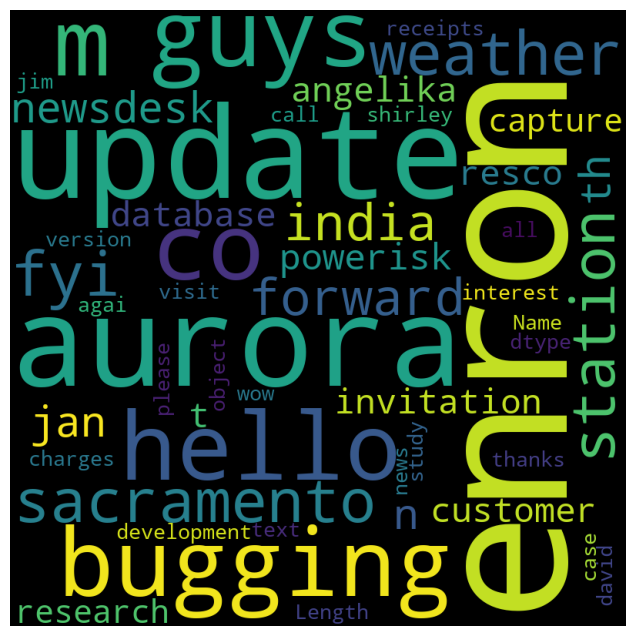

In [10]:
wordcloud = WordCloud(width = 800, height = 800,background_color = 'black', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df1['text']))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

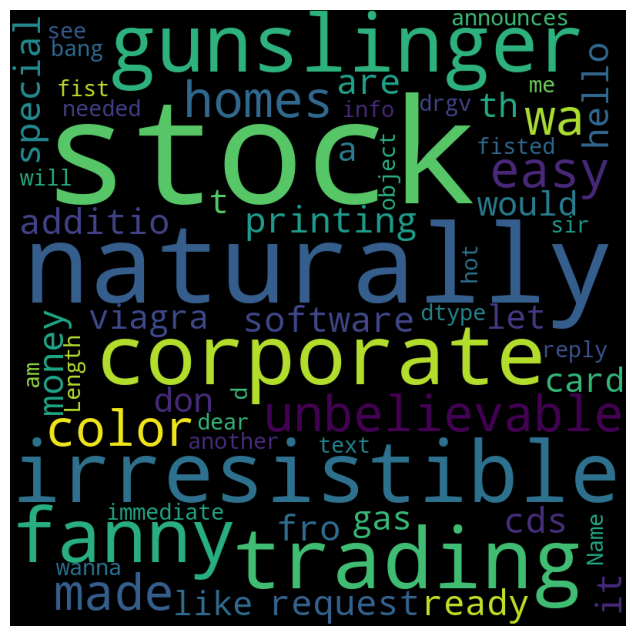

In [11]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()